In [1]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import requests
import os
import urllib.request
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup, Comment
import warnings
warnings.filterwarnings('ignore')
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

In [2]:
logos = nfl.import_team_desc()
display(logos)

,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
5,CHI,Chicago Bears,810,Bears,NFC,NFC North,#0B162A,#E64100,#0b162a,#E64100,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/chi.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
6,CIN,Cincinnati Bengals,920,Bengals,AFC,AFC North,#FB4F14,#000000,#000000,#d32f1e,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/cin.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
7,CLE,Cleveland Browns,1050,Browns,AFC,AFC North,#FF3C00,#311D00,#a5acaf,#d32f1e,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/cle.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
8,DAL,Dallas Cowboys,1200,Cowboys,NFC,NFC East,#002244,#B0B7BC,#acc0c6,#a5acaf,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/dal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
9,DEN,Denver Broncos,1400,Broncos,AFC,AFC West,#002244,#FB4F14,#00234c,#ff5200,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/den.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflvers

In [3]:
logos = logos.drop(logos[logos['team_abbr'] == 'LA'].index)
logos = logos.reset_index(drop=True)
display(logos)

,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
5,CHI,Chicago Bears,810,Bears,NFC,NFC North,#0B162A,#E64100,#0b162a,#E64100,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/chi.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
6,CIN,Cincinnati Bengals,920,Bengals,AFC,AFC North,#FB4F14,#000000,#000000,#d32f1e,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/cin.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
7,CLE,Cleveland Browns,1050,Browns,AFC,AFC North,#FF3C00,#311D00,#a5acaf,#d32f1e,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/cle.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
8,DAL,Dallas Cowboys,1200,Cowboys,NFC,NFC East,#002244,#B0B7BC,#acc0c6,#a5acaf,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/dal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
9,DEN,Denver Broncos,1400,Broncos,AFC,AFC West,#002244,#FB4F14,#00234c,#ff5200,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/den.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflvers

In [4]:
logos = logos[['team_name', 'team_abbr', 'team_logo_espn']]
display(logos.head())

,team_name,team_abbr,team_logo_espn
0,Arizona Cardinals,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,Atlanta Falcons,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,Baltimore Ravens,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,Buffalo Bills,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,Carolina Panthers,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [5]:
#Initialize empty list for logo path
logo_paths = []

#Initialize empty list for the team names and abbreviations
team_name = []
team_abbr = []

#Create folder for logo files if not already exists
if not os.path.exists("logo"):
    os.makedirs("logo")

In [6]:
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logo/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logo/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])
    team_name.append(logos['team_name'][team])

In [7]:
#Create dictionary for team name, team abbr, and log path
team_info = {'Team': team_name, 'Team Abbr' : team_abbr, 'Logo Path' : logo_paths}
#Create dataframe from dictionary
logo_df = pd.DataFrame(team_info)
logo_df.head()

,Team,Team Abbr,Logo Path
0,Arizona Cardinals,ARI,logo/ARI.tif
1,Atlanta Falcons,ATL,logo/ATL.tif
2,Baltimore Ravens,BAL,logo/BAL.tif
3,Buffalo Bills,BUF,logo/BUF.tif
4,Carolina Panthers,CAR,logo/CAR.tif


In [8]:
url_rz = "https://www.teamrankings.com/nfl/stat/red-zone-scoring-pct"
red_zone = pd.read_html(url_rz)[0]
display(red_zone)

,Rank,Team,2023,Last 3,Last 1,Home,Away,2022
0,1,San Francisco,67.16%,61.54%,100.00%,68.75%,65.71%,52.78%
1,2,Miami,65.52%,50.00%,100.00%,62.86%,69.57%,59.26%
2,3,Detroit,64.06%,69.23%,75.00%,71.88%,56.25%,66.18%
3,4,LA Rams,63.64%,75.00%,100.00%,55.56%,71.43%,55.56%
4,5,Washington,63.27%,75.00%,50.00%,57.14%,67.86%,51.06%
5,6,Buffalo,63.08%,46.15%,40.00%,64.71%,61.29%,60.00%
6,7,Arizona,62.79%,60.00%,33.33%,69.57%,55.00%,56.82%
7,8,Baltimore,61.76%,66.67%,0.00%,67.65%,55.88%,44.44%
8,9,Philadelphia,60.00%,55.56%,50.00%,70.00%,50.00%,68.00%
9,10,Cincinnati,59.62%,54.55%,100.00%,64.29%,54.17%,63.64%


In [9]:
red_zone.dtypes

Rank       int64
Team      object
2023      object
Last 3    object
Last 1    object
Home      object
Away      object
2022      object
dtype: object

In [10]:
#red_zone["2023"] = red_zone["2023"].astype(float)
#red_zone.dtypes

In [11]:
red_zone = red_zone.replace('%', '', regex=True)
print(red_zone)

    Rank           Team   2023  Last 3  Last 1   Home   Away   2022
0      1  San Francisco  67.16   61.54  100.00  68.75  65.71  52.78
1      2          Miami  65.52   50.00  100.00  62.86  69.57  59.26
2      3        Detroit  64.06   69.23   75.00  71.88  56.25  66.18
3      4        LA Rams  63.64   75.00  100.00  55.56  71.43  55.56
4      5     Washington  63.27   75.00   50.00  57.14  67.86  51.06
5      6        Buffalo  63.08   46.15   40.00  64.71  61.29  60.00
6      7        Arizona  62.79   60.00   33.33  69.57  55.00  56.82
7      8      Baltimore  61.76   66.67    0.00  67.65  55.88  44.44
8      9   Philadelphia  60.00   55.56   50.00  70.00  50.00  68.00
9     10     Cincinnati  59.62   54.55  100.00  64.29  54.17  63.64
10    11    New England  58.33   66.67    0.00  61.11  55.56  42.22
11    12    LA Chargers  57.45   14.29    0.00  58.62  55.56  54.55
12    13        Chicago  57.14   58.33    0.00  62.96  50.00  56.00
13    14         Dallas  56.34   58.33   71.43  

In [12]:
red_zone["2023"] = red_zone["2023"].astype(float)
red_zone.dtypes

Rank        int64
Team       object
2023      float64
Last 3     object
Last 1     object
Home       object
Away       object
2022       object
dtype: object

In [13]:
red_zone = red_zone[["Rank", "Team", "2023"]]
red_zone = red_zone.rename(columns={"2023": "RZ_TD_PCT"})
red_zone["RZ_TD_PCT"] = round(red_zone["RZ_TD_PCT"],1)
display(red_zone.sort_values("Rank"))

,Rank,Team,RZ_TD_PCT
0,1,San Francisco,67.2
1,2,Miami,65.5
2,3,Detroit,64.1
3,4,LA Rams,63.6
4,5,Washington,63.3
5,6,Buffalo,63.1
6,7,Arizona,62.8
7,8,Baltimore,61.8
8,9,Philadelphia,60.0
9,10,Cincinnati,59.6


In [14]:
red_zone["Team"] = red_zone["Team"].str.replace('Buffalo', 'Buffalo Bills')
red_zone["Team"] = red_zone["Team"].str.replace('San Francisco', 'San Francisco 49ers')
red_zone["Team"] = red_zone["Team"].str.replace('Miami', 'Miami Dolphins')
red_zone["Team"] = red_zone["Team"].str.replace('Arizona', 'Arizona Cardinals')
red_zone["Team"] = red_zone["Team"].str.replace('Washington', 'Washington Commanders')
red_zone["Team"] = red_zone["Team"].str.replace('Detroit', 'Detroit Lions')
red_zone["Team"] = red_zone["Team"].str.replace('LA Chargers', 'Los Angeles Chargers')
red_zone["Team"] = red_zone["Team"].str.replace('Baltimore', 'Baltimore Ravens')
red_zone["Team"] = red_zone["Team"].str.replace('LA Rams', 'Los Angeles Rams')
red_zone["Team"] = red_zone["Team"].str.replace('Philadelphia', 'Philadelphia Eagles')
red_zone["Team"] = red_zone["Team"].str.replace('New England', 'New England Patriots')
red_zone["Team"] = red_zone["Team"].str.replace('Chicago', 'Chicago Bears')
red_zone["Team"] = red_zone["Team"].str.replace('Cincinnati', 'Cincinnati Bengals')
red_zone["Team"] = red_zone["Team"].str.replace('Kansas City', 'Kansas City Chiefs')
red_zone["Team"] = red_zone["Team"].str.replace('Cleveland', 'Cleveland Browns')
red_zone["Team"] = red_zone["Team"].str.replace('Dallas', 'Dallas Cowboys')
red_zone["Team"] = red_zone["Team"].str.replace('Jacksonville', 'Jacksonville Jaguars')
red_zone["Team"] = red_zone["Team"].str.replace('Houston', 'Houston Texans')
red_zone["Team"] = red_zone["Team"].str.replace('Indianapolis','Indianapolis Colts')
red_zone["Team"] = red_zone["Team"].str.replace('New Orleans', 'New Orleans Saints')
red_zone["Team"] = red_zone["Team"].str.replace('Green Bay', 'Green Bay Packers')
red_zone["Team"] = red_zone["Team"].str.replace('Denver', 'Denver Broncos')
red_zone["Team"] = red_zone["Team"].str.replace('Carolina', 'Carolina Panthers')
red_zone["Team"] = red_zone["Team"].str.replace('Minnesota', 'Minnesota Vikings')
red_zone["Team"] = red_zone["Team"].str.replace('Tampa Bay', 'Tampa Bay Buccaneers')
red_zone["Team"] = red_zone["Team"].str.replace('Atlanta', 'Atlants Falcons')
red_zone["Team"] = red_zone["Team"].str.replace('Pittsburgh', 'Pittsburgh Steelers')
red_zone["Team"] = red_zone["Team"].str.replace('Seattle', 'Seattle Seahawks')
red_zone["Team"] = red_zone["Team"].str.replace('Las Vegas', 'Las Vegas Raiders')
red_zone["Team"] = red_zone["Team"].str.replace('NY Giants', 'New York Giants')
red_zone["Team"] = red_zone["Team"].str.replace('Tennessee', 'Tennessee Titans')
red_zone["Team"] = red_zone["Team"].str.replace('NY Jets', 'New York Jets')

display(red_zone)

,Rank,Team,RZ_TD_PCT
0,1,San Francisco 49ers,67.2
1,2,Miami Dolphins,65.5
2,3,Detroit Lions,64.1
3,4,Los Angeles Rams,63.6
4,5,Washington Commanders,63.3
5,6,Buffalo Bills,63.1
6,7,Arizona Cardinals,62.8
7,8,Baltimore Ravens,61.8
8,9,Philadelphia Eagles,60.0
9,10,Cincinnati Bengals,59.6


In [15]:
red_zone_df = pd.merge(red_zone, logo_df)
display(red_zone_df)

,Rank,Team,RZ_TD_PCT,Team Abbr,Logo Path
0,1,San Francisco 49ers,67.2,SF,logo/SF.tif
1,2,Miami Dolphins,65.5,MIA,logo/MIA.tif
2,3,Detroit Lions,64.1,DET,logo/DET.tif
3,4,Los Angeles Rams,63.6,LAR,logo/LAR.tif
4,5,Washington Commanders,63.3,WAS,logo/WAS.tif
5,6,Buffalo Bills,63.1,BUF,logo/BUF.tif
6,7,Arizona Cardinals,62.8,ARI,logo/ARI.tif
7,8,Baltimore Ravens,61.8,BAL,logo/BAL.tif
8,9,Philadelphia Eagles,60.0,PHI,logo/PHI.tif
9,10,Cincinnati Bengals,59.6,CIN,logo/CIN.tif


In [16]:
print("Minimum TD_PCT: ", np.min(red_zone_df["RZ_TD_PCT"]))
print("Maximum TD_PCT: ", np.max(red_zone_df["RZ_TD_PCT"]))

Minimum TD_PCT:  32.4
Maximum TD_PCT:  67.2


In [17]:
def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

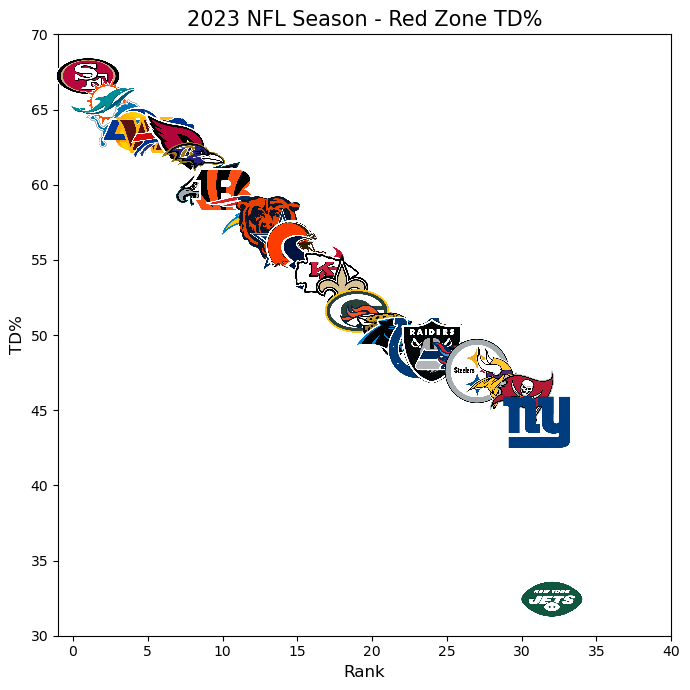

In [18]:
#Define plot size and autolayout setting
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

#Define x and y variables
x = red_zone_df["Rank"]
y = red_zone_df["RZ_TD_PCT"]

#Define image paths
paths = red_zone_df['Logo Path']

#Define plot
fig, ax = plt.subplots()

#Load data into plot
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

#Set plot parameters
plt.xlim(-1, 40);
plt.ylim(30, 70);
#ax.axes.get_xaxis().set_visible(False)
plt.title("2023 NFL Season - Red Zone TD%", fontdict={'fontsize':15});
plt.xlabel("Rank", fontdict={'fontsize':12});
plt.ylabel("TD%", fontdict={'fontsize':12});